In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization style
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("simulated_nELISA_data.csv")
df.head()

,Sample_ID,Group,Time_Point,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5
0,1,Treatment_B,Day_14,10.451517,13.205269,10.637356,12.421139,17.122533
1,2,Control,Day_14,6.929153,11.281730,7.704341,17.114701,12.577628
2,3,Treatment_B,Day_14,7.299115,9.323649,10.014059,12.375300,8.938442
3,4,Treatment_B,Day_1,9.730601,10.433521,11.795157,12.122781,15.088491
4,5,Control,Day_14,8.909606,11.391132,12.288202,16.483928,11.218730


In [4]:
#DataFrame information
df.info()

#Summary statistics 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample_ID   100 non-null    int64  
 1   Group       100 non-null    object 
 2   Time_Point  100 non-null    object 
 3   Protein_1   100 non-null    float64
 4   Protein_2   100 non-null    float64
 5   Protein_3   100 non-null    float64
 6   Protein_4   100 non-null    float64
 7   Protein_5   100 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB


,Sample_ID,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,8.485374,14.576692,11.201282,13.742504,11.814809
std,29.011492,2.282274,3.469611,2.760171,2.815485,2.591100
min,1.000000,1.733694,7.747456,4.734687,7.514826,6.381267
25%,25.750000,7.120482,11.774785,9.226726,11.788361,9.862390
50%,50.500000,8.450363,13.659501,11.267583,13.732381,11.953088
75%,75.250000,9.800166,17.277453,13.275340,15.568897,13.449216
max,100.000000,13.362460,22.441862,16.768274,20.353728,18.905972


In [5]:
#Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

#Drop rows with missing values
df.dropna(inplace=True)



Missing values per column:
 Sample_ID     0
Group         0
Time_Point    0
Protein_1     0
Protein_2     0
Protein_3     0
Protein_4     0
Protein_5     0
dtype: int64


In [6]:
#Convert 'Group' and `'Time_point' to categorical types
df['Group'] = df['Group'].astype('category')
df['Time_Point'] = df['Time_Point'].astype('category')

In [10]:
#Get summary statistics for each protein
df.describe()


,Sample_ID,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,8.485374,14.576692,11.201282,13.742504,11.814809
std,29.011492,2.282274,3.469611,2.760171,2.815485,2.591100
min,1.000000,1.733694,7.747456,4.734687,7.514826,6.381267
25%,25.750000,7.120482,11.774785,9.226726,11.788361,9.862390
50%,50.500000,8.450363,13.659501,11.267583,13.732381,11.953088
75%,75.250000,9.800166,17.277453,13.275340,15.568897,13.449216
max,100.000000,13.362460,22.441862,16.768274,20.353728,18.905972


In [12]:
# Automatically detect protein columns 
non_protein_cols = ["Sample_ID", "Group", "Time_Point"]  
proteins = [col for col in df.columns if col not in non_protein_cols]


In [13]:
# Group by treatment and calculate mean concentration per protein
grouped_means = df.groupby("Group")[proteins].mean()
grouped_stds = df.groupby("Group")[proteins].std()

# Display results
print("Mean Protein Concentrations by Group:\n", grouped_means)
print("\nStandard Deviations:\n", grouped_stds)


Mean Protein Concentrations by Group:
              Protein_1  Protein_2  Protein_3  Protein_4  Protein_5
Group                                                             
Control       9.136983  13.029015  10.656669  13.402755   9.987834
Treatment_A   7.266664  18.382096  13.361065  15.901408  12.478658
Treatment_B   9.207002  11.805039   9.272898  11.597059  12.988733

Standard Deviations:
              Protein_1  Protein_2  Protein_3  Protein_4  Protein_5
Group                                                             
Control       2.150715   1.944473   2.401499   1.914432   2.118638
Treatment_A   1.800895   1.935843   1.977610   2.603671   1.928988
Treatment_B   2.384070   1.835935   2.158768   1.965767   2.720666


C:\Users\reedj\AppData\Local\Temp\ipykernel_23396\466755998.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby("Group")[proteins].mean()
C:\Users\reedj\AppData\Local\Temp\ipykernel_23396\466755998.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stds = df.groupby("Group")[proteins].std()


In [15]:
!pip install scipy


  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\nELISA_data\nELISA_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
import scipy
print(scipy.__version__)


1.13.1


In [17]:
from scipy.stats import f_oneway

# Perform ANOVA for each protein
anova_results = {protein: f_oneway(
    df[df["Group"] == "Control"][protein],
    df[df["Group"] == "Treatment_A"][protein],
    df[df["Group"] == "Treatment_B"][protein]
) for protein in proteins}

# Display ANOVA results
for protein, result in anova_results.items():
    print(f"{protein}: F-statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Protein_1: F-statistic = 9.3874, p-value = 0.0002
Protein_2: F-statistic = 115.1168, p-value = 0.0000
Protein_3: F-statistic = 30.8087, p-value = 0.0000
Protein_4: F-statistic = 32.3993, p-value = 0.0000
Protein_5: F-statistic = 16.5015, p-value = 0.0000


<Figure size 1200x600 with 0 Axes>

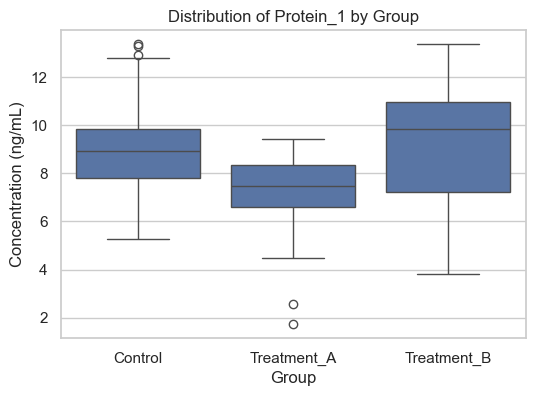

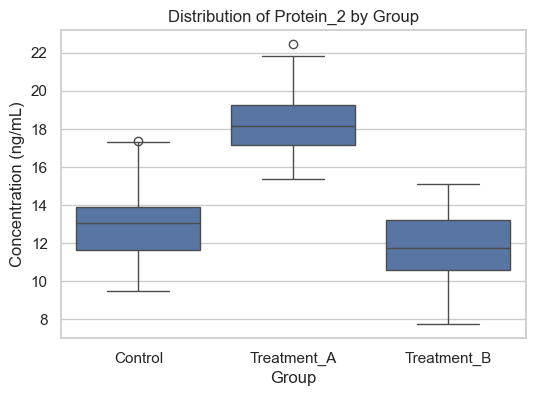

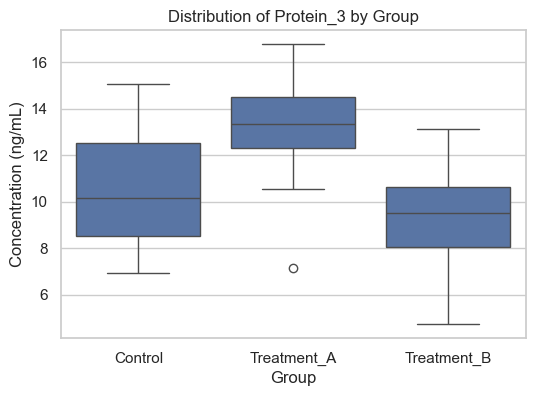

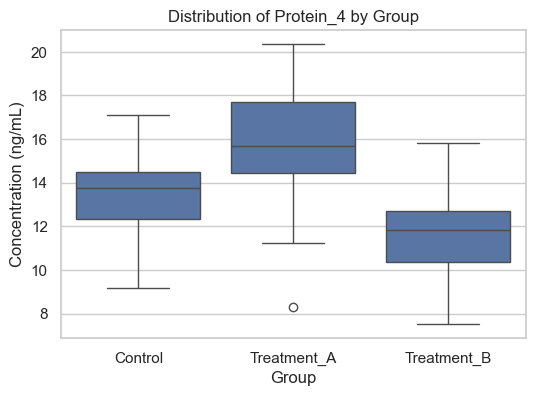

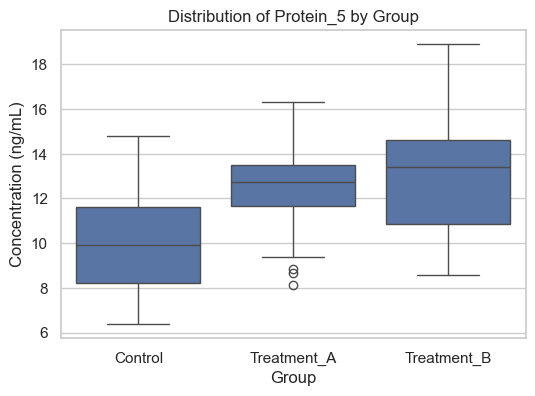

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up visualization
plt.figure(figsize=(12, 6))

# Create boxplots for each protein
for protein in proteins:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Group", y=protein, data=df)
    plt.title(f"Distribution of {protein} by Group")
    plt.xlabel("Group")
    plt.ylabel("Concentration (ng/mL)")
    plt.show()


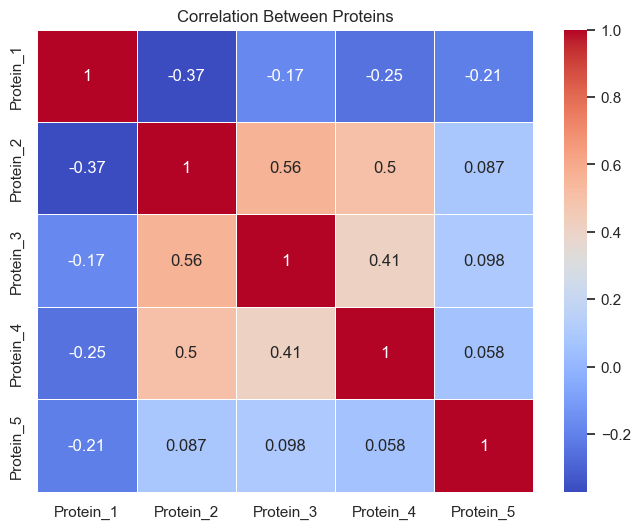

In [19]:
# Compute correlation matrix
corr_matrix = df[proteins].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Proteins")
plt.show()


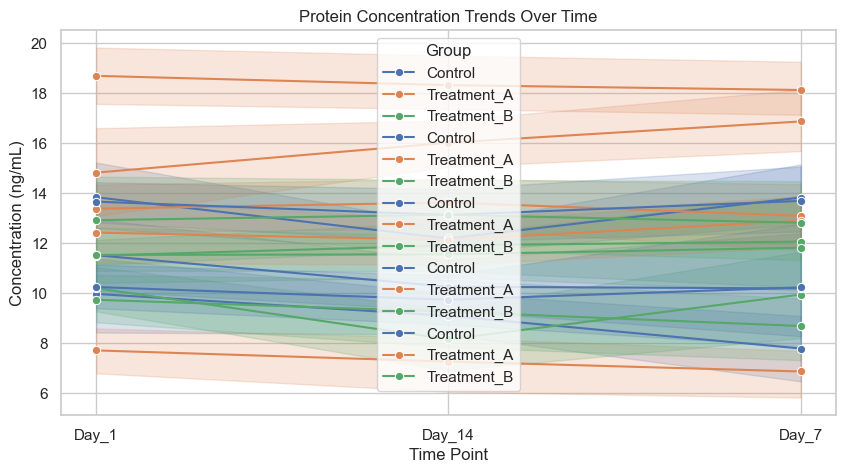

In [20]:
plt.figure(figsize=(10, 5))

# Plot trends for each protein
for protein in proteins:
    sns.lineplot(data=df, x="Time_Point", y=protein, hue="Group", marker="o")

plt.title("Protein Concentration Trends Over Time")
plt.xlabel("Time Point")
plt.ylabel("Concentration (ng/mL)")
plt.legend(title="Group")
plt.show()


In [24]:
!pip install ipywidgets plotly


You should consider upgrading via the 'C:\Users\reedj\OneDrive\Desktop\nELISA_data\nELISA_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [25]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd


In [26]:
# Load dataset
df = pd.read_csv('simulated_nELISA_data.csv')

# Dropdown to select protein
protein_dropdown = widgets.Dropdown(
    options=df.columns[3:],  # Assuming first 3 columns are metadata
    description='Protein:',
    style={'description_width': 'initial'}
)

# Function to update the boxplot
def update_boxplot(protein):
    fig = px.box(df, x="Group", y=protein, title=f"{protein} Concentration by Group",
                 color="Group", points="all")
    fig.show()

# Display interactive widget
widgets.interactive(update_boxplot, protein=protein_dropdown)


interactive(children=(Dropdown(description='Protein:', options=('Protein_1', 'Protein_2', 'Protein_3', 'Protei…

In [27]:
concentration_slider = widgets.FloatRangeSlider(
    value=[df[protein_dropdown.value].min(), df[protein_dropdown.value].max()],
    min=df[protein_dropdown.value].min(),
    max=df[protein_dropdown.value].max(),
    step=0.1,
    description='Concentration Range:',
    style={'description_width': 'initial'}
)

def filter_data(protein, concentration):
    filtered_df = df[(df[protein] >= concentration[0]) & (df[protein] <= concentration[1])]
    fig = px.box(filtered_df, x="Group", y=protein, title=f"{protein} Concentration by Group (Filtered)",
                 color="Group", points="all")
    fig.show()

widgets.interactive(filter_data, protein=protein_dropdown, concentration=concentration_slider)


interactive(children=(Dropdown(description='Protein:', options=('Protein_1', 'Protein_2', 'Protein_3', 'Protei…